In [1]:
import ROOT as rt
import sys
import os

sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np



Welcome to ROOTaaS 6.06/05


In [ ]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR" ,
         'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']

# Input variables used for the regression
x = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [ ]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc_moriond17_v7")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 0 
# stopEvtmc  = 2000000
# startEvtmc = 2000001
# # stopEvtmc  = 3000000
stopEvtmc  = -1
fname = 'df_mc_moriond17_v7_%d-%d.h5' % ( startEvtmc, stopEvtmc )
if os.path.exists(fname):
      qr_mc.df = pd.read_hdf(fname)
else:
    qr_mc.loadDF("../nt/double_ele_v7_moriond17_mc/",
                 "cicNoSigmaIetaIeta/trees/",
                 ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
                  startEvtmc, stopEvtmc, 12345)

# qr_mc.df = pd.read_hdf('df_mc_2000001-3000000.h5')

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'leadSigEOverE', 'leadRecoSigEOverE', 'leadUnsmearedSigmaEoE', 'leadAfterSSTrSigEOverE', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA', 'subleadSigEOverE', 'subleadRecoSigEOverE', 'leadUnsmearedSigmaEoE', 'leadAfterSSTrSigEOverE']
['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9',

In [ ]:
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
#setupJoblib(ipp_profile='long')
# %time qr_mc.correctAllY(x, ylist, quantiles, forceComputeCorrections=True, n_jobs=20)

In [ ]:
qr_mc.df.index.size

In [ ]:
dfmc     = qr_mc.getDF()


In [ ]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data_moriond17_v7")
startEvtdata = 0
#stopEvtdata   = 1000000
stopEvtdata   = -1
print "Load the data dataframe"
fname = 'df_data_moriond17_v7_%d-%d.h5' % ( startEvtdata, stopEvtdata )

if os.path.exists(fname):
    qr_data.df = pd.read_hdf(fname)
else:
    qr_data.loadDF("../nt/double_ele_v7_moriond17_data/",
                    "cicNoSigmaIetaIeta/trees/",
                    ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
                    startEvtdata, stopEvtdata)


index                 21192423
rho                   21192423
nvtx                  21192423
mass                  21192423
weight                21192423
Pt                    21192423
ScEta                 21192423
Phi                   21192423
R9                    21192423
S4                    21192423
SigmaIeIe             21192423
EtaWidth              21192423
PhiWidth              21192423
CovarianceIphiIphi    21192423
SigmaRR               21192423
ScEnergy              21192423
CovarianceIetaIphi    21192423
PhoIso03              21192423
ChIso03               21192423
ChIso03worst          21192423
ScPreshowerEnergy     21192423
PhoIDMVA              21192423
SigEOverE             21192423
RecoSigEOverE         21192423
UnsmearedSigEOverE    21192423
AfterSSTrSigEOverE    21192423
dtype: int64
Index([u'index', u'rho', u'nvtx', u'mass', u'weight', u'Pt', u'ScEta', u'Phi',
       u'R9', u'S4', u'SigmaIeIe', u'EtaWidth', u'PhiWidth',
       u'CovarianceIphiIphi', u'SigmaRR',

In [ ]:
dfdata = qr_data.getDF()


In [ ]:
# rt.gROOT.LoadMacro("../phoIsoStoch/IsolationCorrection.C")

In [ ]:
# isoCorr = rt.IsolationCorrection("../phoIsoStoch/corrections_hybrid.root")

In [ ]:
# def applyCorr(row):
#     rho,eta,iso = row['rho'],np.abs(row['ScEta']),row['PhoIso03']
#     return iso+isoCorr.getExtra(eta,rho)

# dfmc['PhoIso03_corr'] = dfmc[['rho','ScEta','PhoIso03']].apply(applyCorr,axis=1)


In [ ]:
n_jobs=20

In [ ]:
qr_mc.correctPhoIso("../phoIsoStoch/pho_iso_corrections_hybrid_moriond17_v2.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/musella/Analysis/jupyter/dataMC/MTR/../phoIsoStoch/pho_iso_corrections_hybrid_moriond17_v2.root


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:    4.5s remaining:   43.0s
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:    5.0s remaining:   21.1s
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:    5.6s remaining:   13.9s
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:    6.1s remaining:    9.9s
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:    6.4s remaining:    7.1s
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:    6.8s remaining:    5.1s
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:    7.3s remaining:    3.6s
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:    7.5s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:    8.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:    9.3s finished


In [ ]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']
mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
        ("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)) ] 
mvas_ichep = [ ("ichepPhoID",[]), ("ichepPhoIDcorrIso",['PhoIso03']) ] 

# mvas = [ ("moriondPhoID",[]), ("moriondPhoIDcorrShowerShapes",showerShapes),  ("moriondPhoIDcorrIso",'PhoIso03'), 
#          ("moriondPhoIDcorr",showerShapes+['PhoIso03']) ] 

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")
weights_ichep = ("./phoIDMVAweights/MVAweights_80X_barrel_ICHEPvtx.xml","./phoIDMVAweights/MVAweights_80X_endcap_ICHEPvtx.xml")


In [ ]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed: 11.0min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed: 11.1min remaining: 105.0min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed: 11.4min remaining: 48.6min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed: 11.4min remaining: 28.6min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed: 11.5min remaining: 18.7min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed: 11.6min remaining: 12.7min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed: 11.6min remaining:  8.7min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed: 11.8min remaining:  5.9min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed: 11.8min remaining:  3.7min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed: 11.9min remaining:  2.0min
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed: 13.5min finished


CPU times: user 3.94 s, sys: 6.16 s, total: 10.1 s
Wall time: 13min 28s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  5.5min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  5.6min remaining: 52.7min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  5.6min remaining: 23.8min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  5.7min remaining: 14.3min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  5.9min remaining:  9.6min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  6.3min remaining:  6.9min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  6.3min remaining:  4.7min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  6.4min remaining:  3.2min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  6.4min remaining:  2.0min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  6.6min remaining:  1.1min
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  7.3min finished


Computing moriondPhoIDcorrIso, correcting {'rhoSubtraction': True, 'correct': ['PhoIso03']}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  4.5min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  4.6min remaining: 43.3min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  6.2min remaining: 26.2min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  6.6min remaining: 16.4min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  6.7min remaining: 10.9min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  6.9min remaining:  7.5min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  6.9min remaining:  5.2min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  7.1min remaining:  3.6min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  7.6min remaining:  2.4min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  7.7min remaining:  1.3min
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  7.8min finished


CPU times: user 4.9 s, sys: 7.58 s, total: 12.5 s
Wall time: 15min 10s


In [ ]:
%time qr_data.computeIdMvas( mvas_ichep[:1],  weights_ichep, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas_ichep, weights_ichep, n_jobs=n_jobs )

Computing ichepPhoID, correcting []


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  2.1min remaining: 20.2min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  2.1min remaining:  9.1min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  2.2min remaining:  5.4min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  2.2min remaining:  3.5min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  2.2min remaining:  2.4min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  2.2min remaining:  1.7min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  2.2min remaining:   41.9s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  2.3min remaining:   22.6s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  2.3min finished


CPU times: user 3.58 s, sys: 5.01 s, total: 8.59 s
Wall time: 2min 19s
Computing ichepPhoID, correcting []


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  1.2min remaining: 11.2min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  1.2min remaining:  5.0min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  1.2min remaining:  3.0min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  1.2min remaining:  2.0min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  1.2min remaining:  1.3min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  1.2min remaining:   54.7s
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  1.2min remaining:   36.5s
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  1.2min remaining:   23.1s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  1.2min remaining:   12.4s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  1.3min finished


Computing ichepPhoIDcorrIso, correcting ['PhoIso03']


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  1.2min remaining: 11.1min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  1.2min remaining:  5.0min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  1.2min remaining:  3.0min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  1.2min remaining:  2.0min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  1.2min remaining:  1.3min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  1.2min remaining:   55.8s
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  1.3min remaining:   37.5s
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  1.3min remaining:   23.6s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  1.3min remaining:   12.9s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  1.3min finished


CPU times: user 5.07 s, sys: 7.49 s, total: 12.6 s
Wall time: 2min 39s


In [ ]:
# print dfmcEB
# print dfmcEE
# print dfEB
# print dfEE

In [23]:
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')



In [24]:
from copy import copy

def data_mc(df_data,df_mc,var,bins,weight='weight',mclabels=[""],normalize=True,norm_min=0):
    
    weights = df_mc[weight].values if weight else None
    
    hists_mc = map(lambda x: np.histogram(df_mc['%s%s' % (var,x)].values,density=normalize,weights=weights,bins=bins)[0], 
                   mclabels)
    hist_data,_ =  np.histogram(df_data[var].values, density=False, bins=bins)

    norm_region = bins >= norm_min
    
    if normalize:
        hists_mc = map(lambda x: x*hist_data[norm_region[1:]].sum() / x[norm_region[1:]].sum(), hists_mc)    
    
    return hist_data,hists_mc


def draw_data_mc(bins,data,mc,figsize=(8,6),var=None,logy=False,ratio=False,
                **kwargs):
    
    mcstyle=dict(alpha=0.5,linewidth=0)
    mcstyle.update(kwargs)
    datastyle=copy(kwargs)
    datastyle["alpha"] = 1. # No transparency for data
    
    binw=bins[1]-bins[0]
    if ratio:
        fig, axes = plt.subplots(2,figsize=figsize,sharex=True,gridspec_kw = {'height_ratios':[3, 1]})
        top = axes[0]
        bottom = axes[1]
        fig.tight_layout()
    else:
        fig = plt.figure(figsize=figsize)
        axes = None
        top = plt
    
    # FIXME: assumes uniform binning
    xc = bins[1:]-binw*0.5
    
    #print mc
    for hist, style in mc:
        pkwargs = copy(mcstyle)
        pkwargs.update(style)
        top.plot(xc+binw*0.5,hist,**pkwargs)
    top.errorbar( xc+binw*0.5, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black', 
                 label='Data', fmt='o', **datastyle )
        
    if axes == None: axes = fig.axes
    
    if ratio:
        ratios = []
        for hist, style in mc:
            rdata = data / hist
            rdata_err = np.sqrt(data) / hist
            ratios.append((rdata,rdata_err))
            rkwargs = {}
            if len(mc) == 1: rkwargs['color'] = 'black'
            elif "color" in style: rkwargs['color'] = style['color']
            rkwargs.update(datastyle)
            bottom.errorbar( xc+binw*0.5, rdata,ls='None', xerr=np.ones_like(rdata)*binw*0.5, yerr=rdata_err, 
                        **rkwargs)
        
        bottom.plot( (bins[0],bins[-1]), (1,1), 'k-' )
        bottom.set_ylabel('Data / MC')
        bottom.set_ylim(0,2)
    
    if logy:
        axes[0].set_yscale('log')
    axes[0].set_xlim(bins[0],bins[-1])
    
    unit = None    
    if var != None:
        if type(var) != str:
            var, unit = var
        if unit: var += " (%s)" % unit
        axes[-1].set_xlabel(var)
    ylabel = 'Events / %1.3g' % binw
    if unit:
        ylabel += ' %s' % unit
    axes[0].set_ylabel(ylabel)

    top.legend(loc='best')
        

In [25]:
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)') 

In [26]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)') 

/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


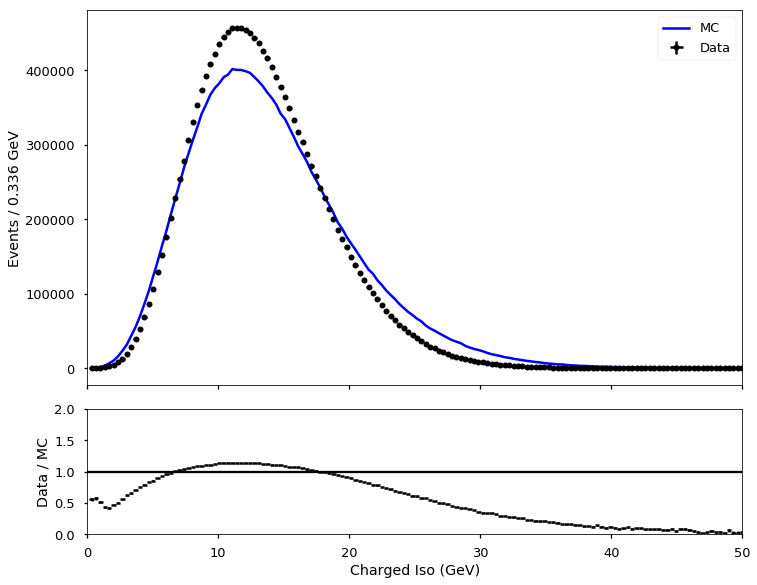

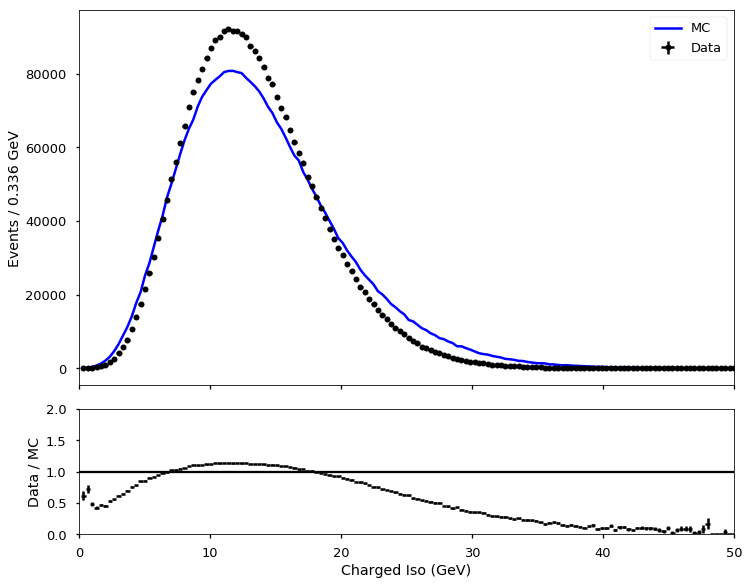

In [28]:
rhobins = np.linspace(0,50,150)
var = 'rho'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

ratios = []

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,rhobins,mclabels=mclabels, weight=None)
    ratios.append( data / mc)
    draw_data_mc(rhobins, data, zip(mc,mcstyles), var=('Charged Iso','GeV'), markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))


In [29]:
def rewei(row):
    
    rho = row[0]
    eta = np.abs(row[1])
    irho = np.searchsorted(rhobins,rho)
    if irho > 0: irho -= 1
    if irho >= ratios[0][0].size: irho = -1
    return ratios[0][0][irho] if eta < 1.5 else ratios[1][0][irho]
    

In [30]:
dfmc['weight'] = dfmc[['rho','ScEta']].apply(rewei,axis=1,raw=True)

In [31]:
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)') 

/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in divide
/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in divide


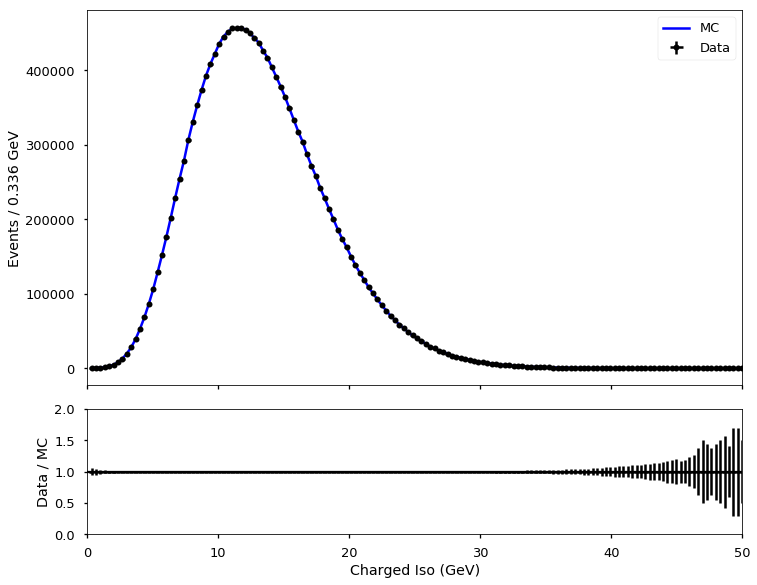

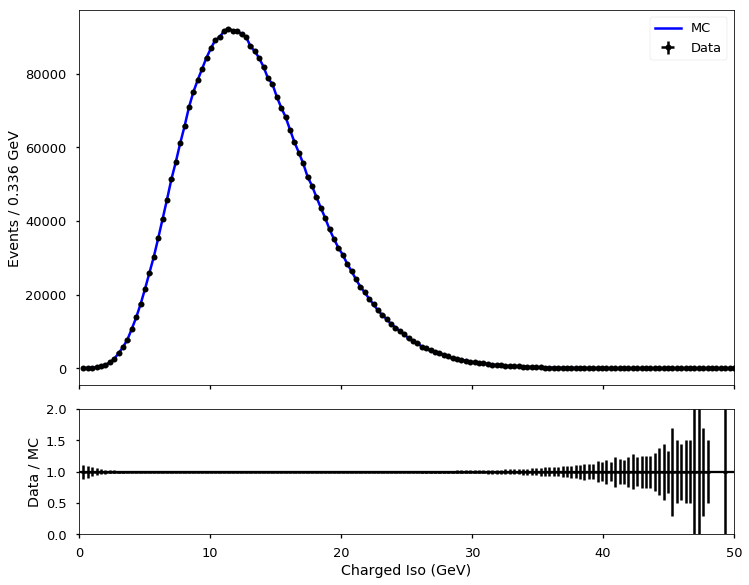

In [32]:
rhobins = np.linspace(0,50,150)
var = 'rho'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,rhobins,mclabels=mclabels)
    draw_data_mc(rhobins, data, zip(mc,mcstyles), var=('Charged Iso','GeV'), markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))


/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


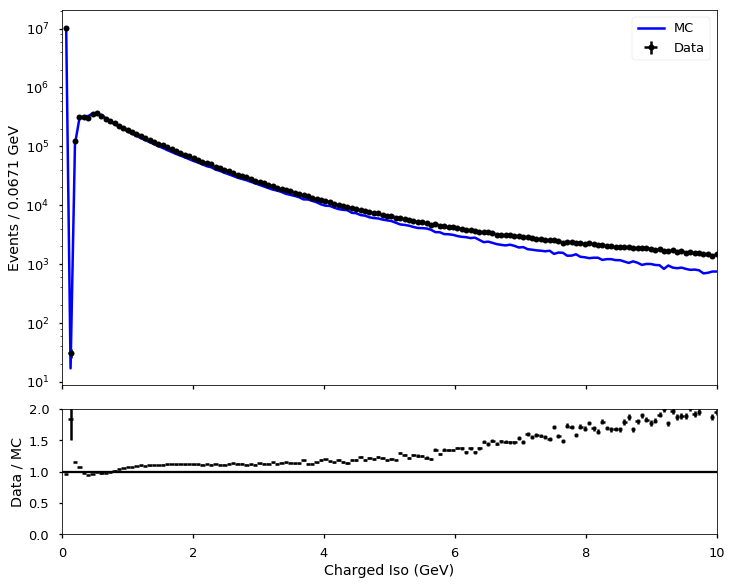

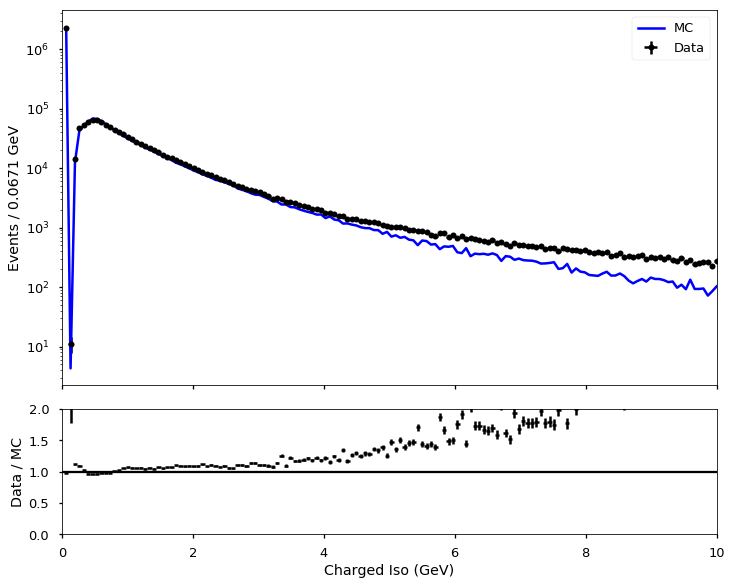

In [33]:
bins = np.linspace(0,10,150)
var = 'ChIso03'
mclabels = [ '' ]
mcstyles = [ dict(label='MC',color='blue') ]


for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var=('Charged Iso','GeV'), markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8), logy=True)


/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


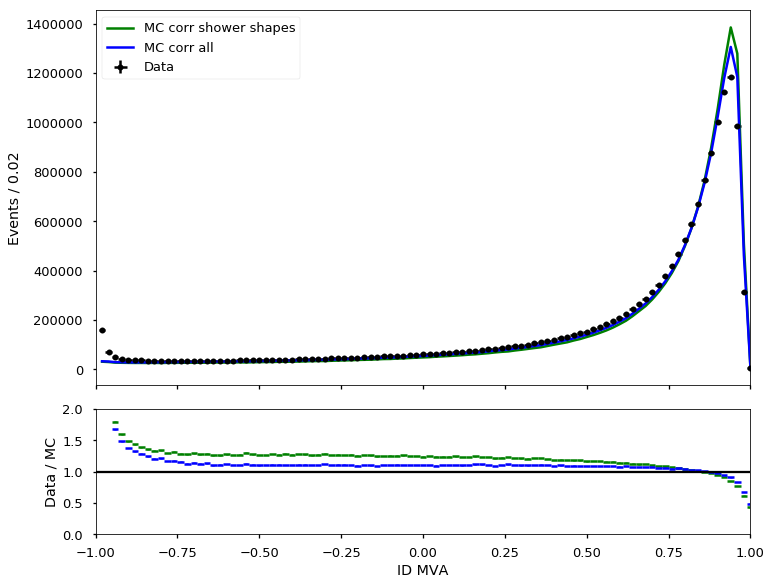

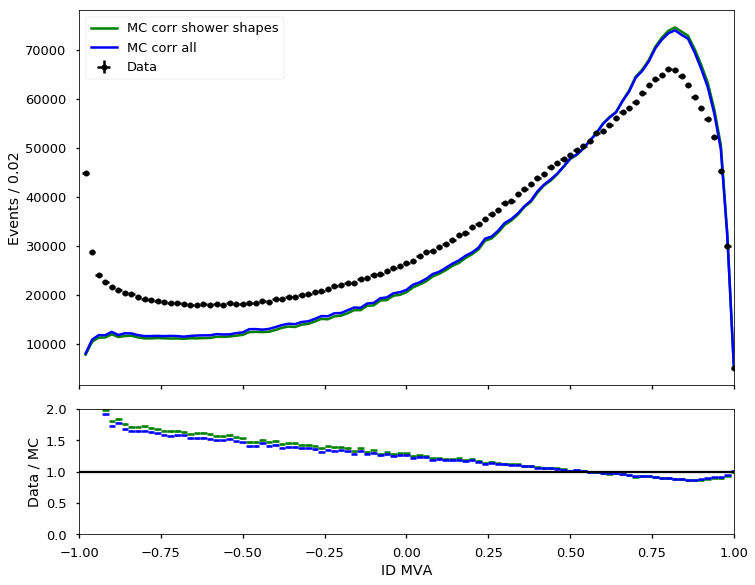

In [34]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
# mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
# mcstyles = [ dict(label='MC no corr',color='darkturquoise'), 
#              dict(label='MC corr shower shapes',color='green'), 
#              dict(label='MC corr iso',color='orange'),
#              dict(label='MC corr all',color='blue'), 
#            ]
mclabels = [ '', 'corrIso' ]
mcstyles = [ dict(label='MC corr shower shapes',color='green'), 
             dict(label='MC corr all',color='blue'), 
           ]


for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))


In [35]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 

In [36]:
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 

/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


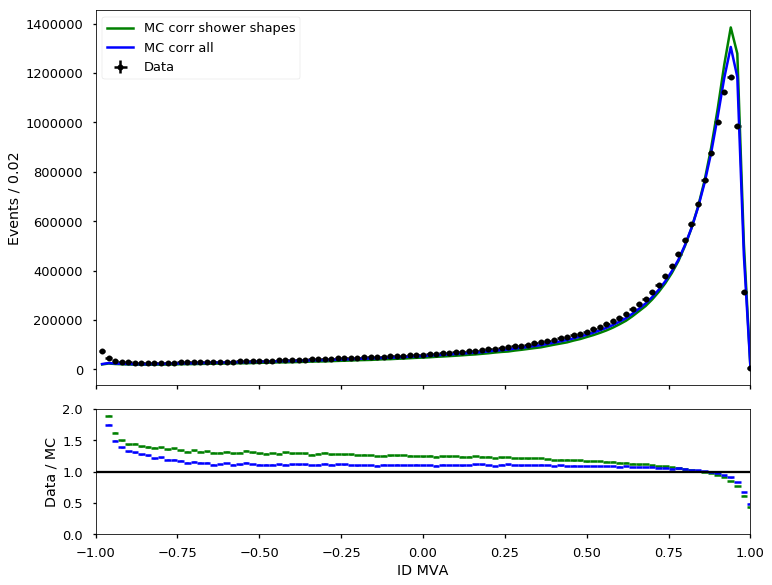

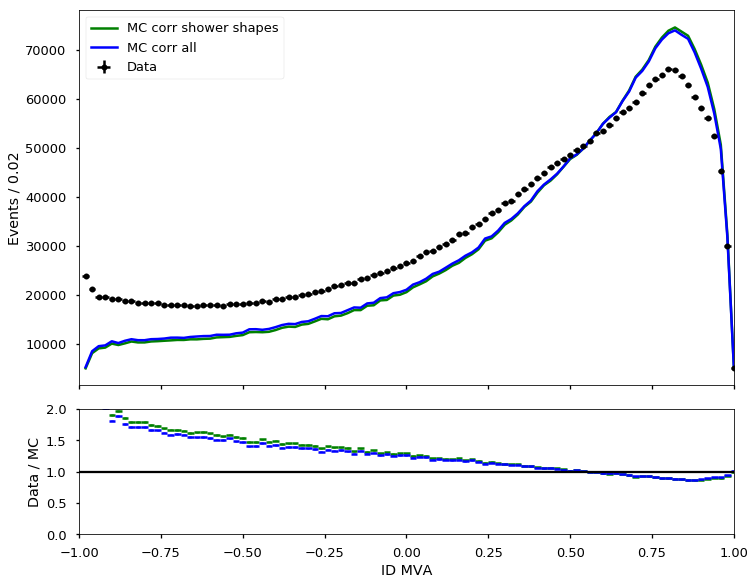

In [37]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
# mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
# mcstyles = [ dict(label='MC no corr',color='green'), 
#              dict(label='MC corr shower shapes',color='green'), 
#              dict(label='MC corr iso',color='orange'),
#              dict(label='MC corr all',color='blue'), 
#            ]
mclabels = [ '', 'corrIso' ]
mcstyles = [ dict(label='MC corr shower shapes',color='green'), 
             dict(label='MC corr all',color='blue'), 
           ]


for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))


In [38]:
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)') 

In [39]:
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)') 

/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


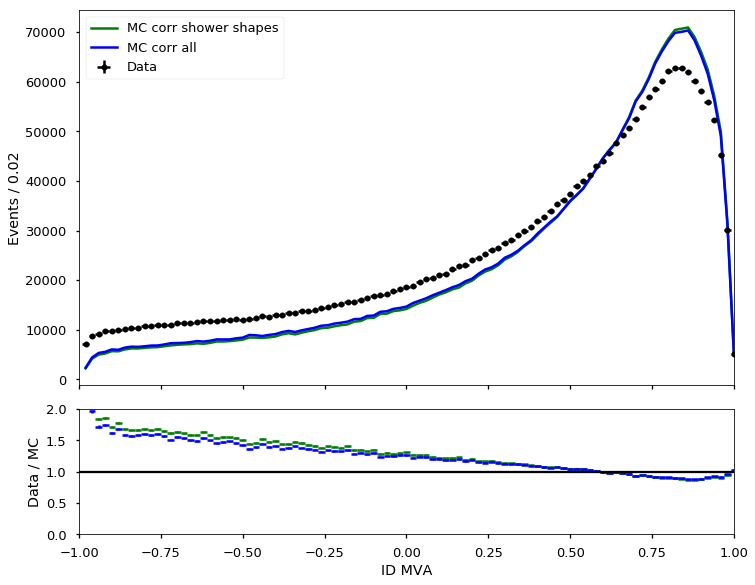

In [40]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
# mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
# mcstyles = [ dict(label='MC no corr',color='green'), 
#              dict(label='MC corr shower shapes',color='green'), 
#              dict(label='MC corr iso',color='orange'),
#              dict(label='MC corr all',color='blue'), 
#            ]
mclabels = [ '', 'corrIso' ]
mcstyles = [ dict(label='MC corr shower shapes',color='green'), 
             dict(label='MC corr all',color='blue'), 
           ]


for dfs in [ (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))


/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


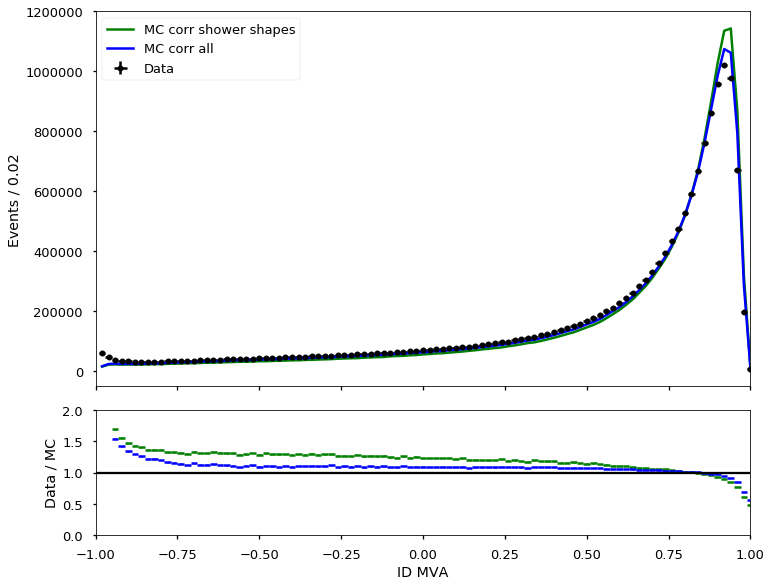

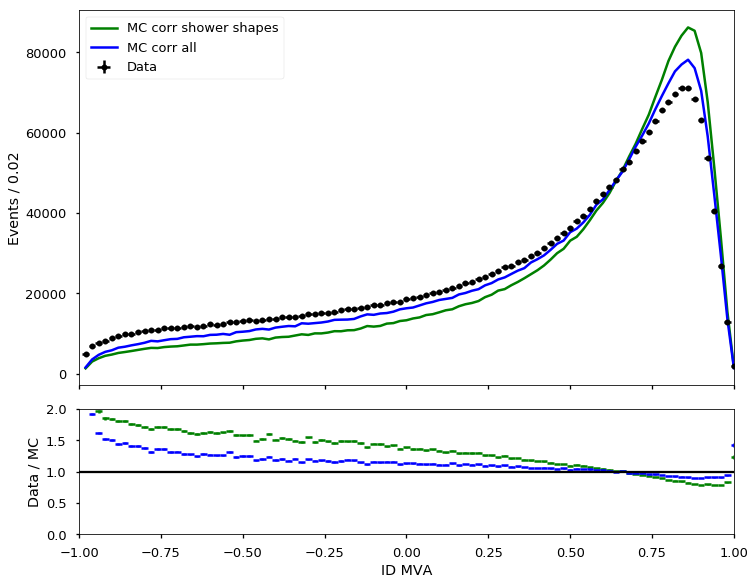

In [41]:
bins = np.linspace(-1,1,101)
var = 'ichepPhoID'
# mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
# mcstyles = [ dict(label='MC no corr',color='green'), 
#              dict(label='MC corr shower shapes',color='green'), 
#              dict(label='MC corr iso',color='orange'),
#              dict(label='MC corr all',color='blue'), 
#            ]
mclabels = [ '', 'corrIso' ]
mcstyles = [ dict(label='MC corr shower shapes',color='green'), 
             dict(label='MC corr all',color='blue'), 
           ]


for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))


In [42]:
# bins = np.linspace(-1,1,101)
# var = 'PhoIDMVA'
# # mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
# # mcstyles = [ dict(label='MC no corr',color='green'), 
# #              dict(label='MC corr shower shapes',color='green'), 
# #              dict(label='MC corr iso',color='orange'),
# #              dict(label='MC corr all',color='blue'), 
# #            ]
# mclabels = [ '' ]
# mcstyles = [ dict(label='MC corr shower shapes',color='green'), 
#              dict(label='MC corr all',color='blue'), 
#            ]


# for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
#     data, mc = data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
#     draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
# #     with plt.xkcd()
# #         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))


In [43]:
dfdata.index.size

21105637

In [44]:
dfmc.index.size

11554914

In [45]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,100,21)

dfmc['ptBin'] = pd.cut(dfmc.Pt,binsPt)
dfdata['ptBin'] = pd.cut(dfdata.Pt,binsPt)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

binsRho = np.linspace(0,25,26)

dfmc['rhoBin'] = pd.cut(dfmc.rho,binsRho)
dfdata['rhoBin'] = pd.cut(dfdata.rho,binsRho)

dfmcEB['rhoBin'] = pd.cut(dfmcEB.rho,binsRho)
dfEB['rhoBin'] = pd.cut(dfEB.rho,binsRho)

dfmcEE['rhoBin'] = pd.cut(dfmcEE.rho,binsRho)
dfEE['rhoBin'] = pd.cut(dfEE.rho,binsRho)




/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [46]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[0].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[0].values()))


/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


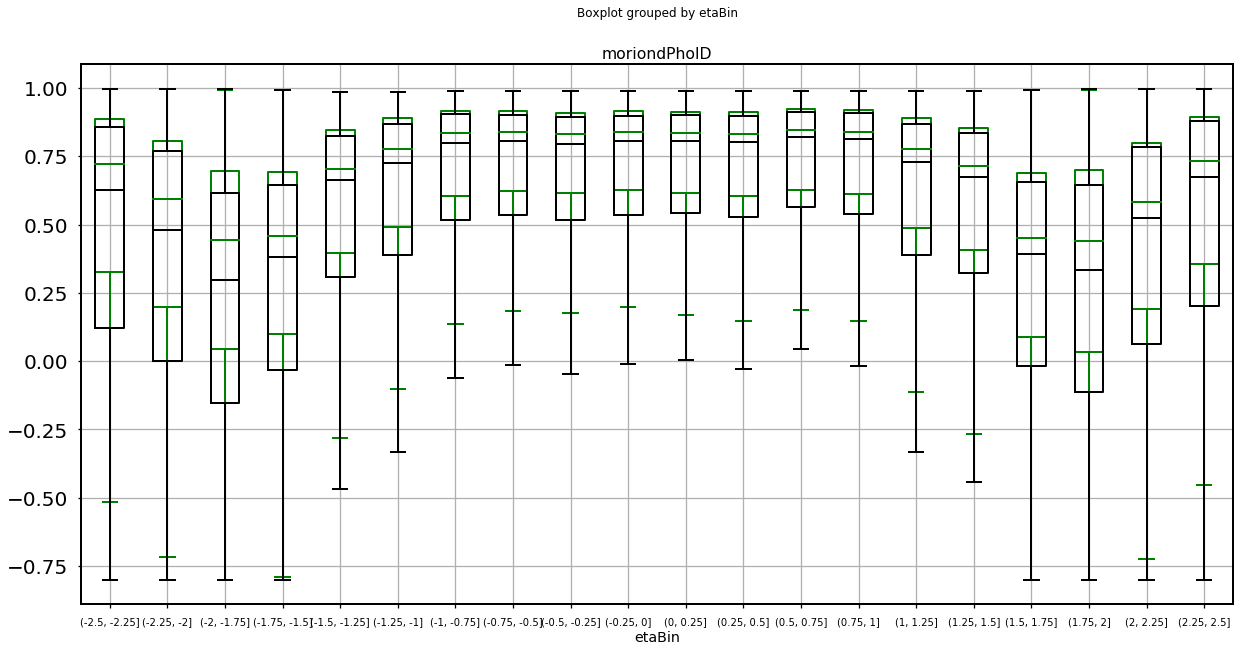

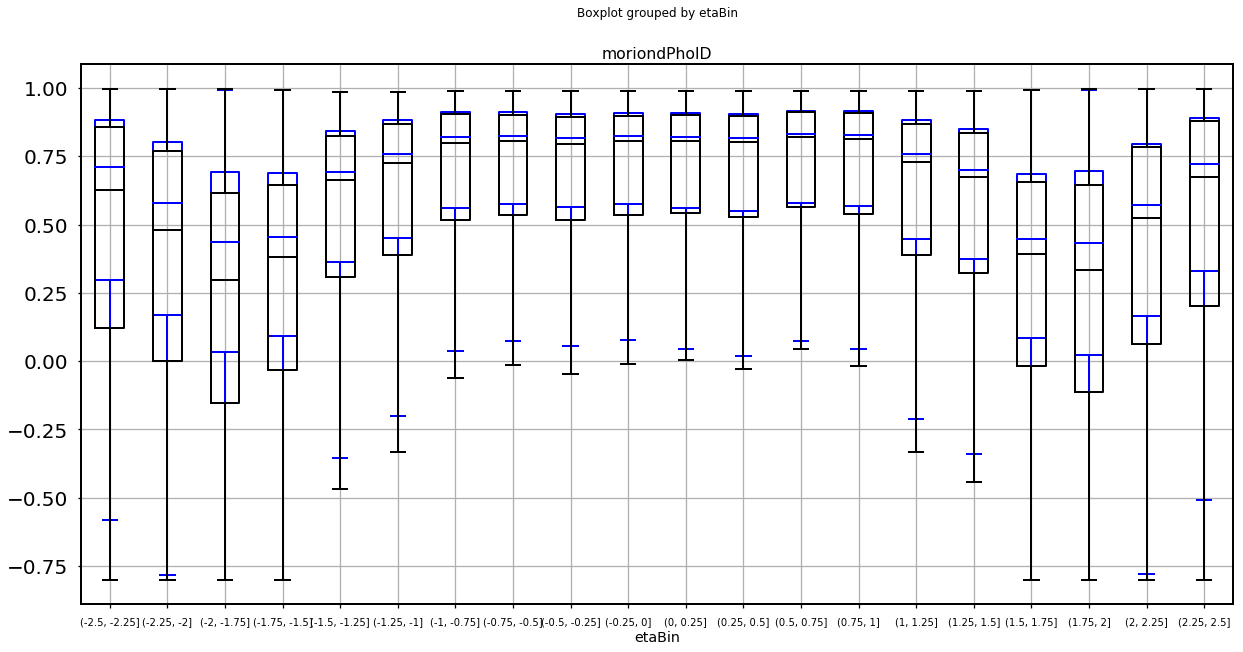

In [47]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrIso', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')
fig.show()

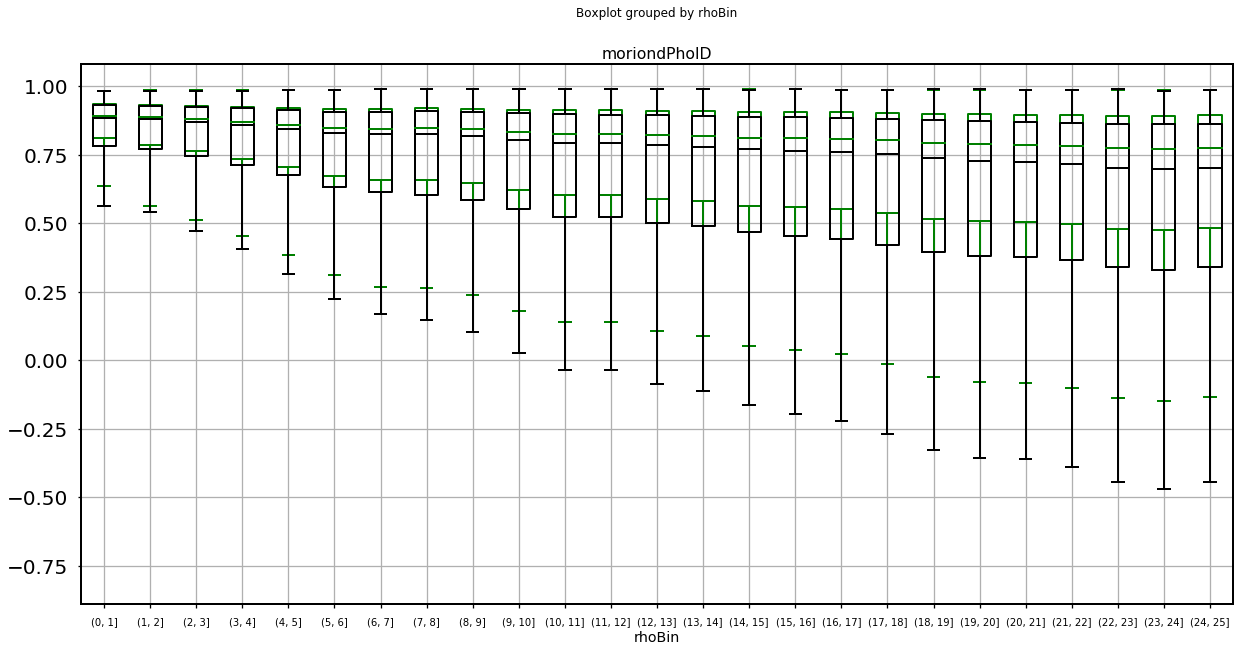

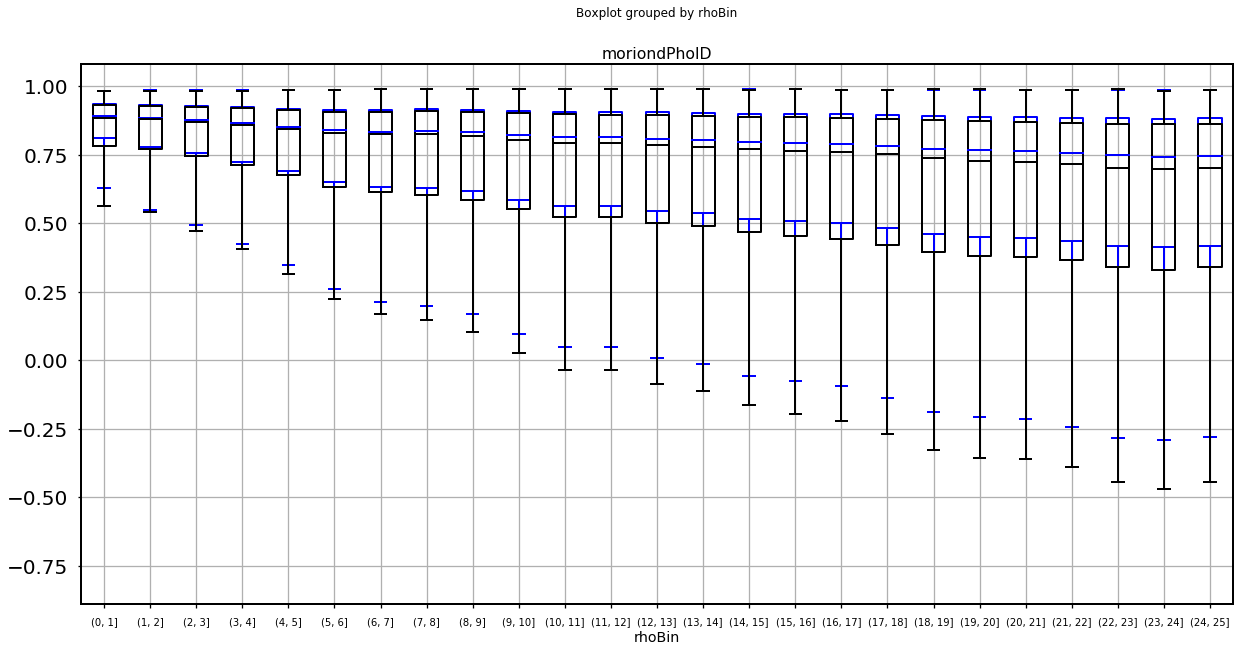

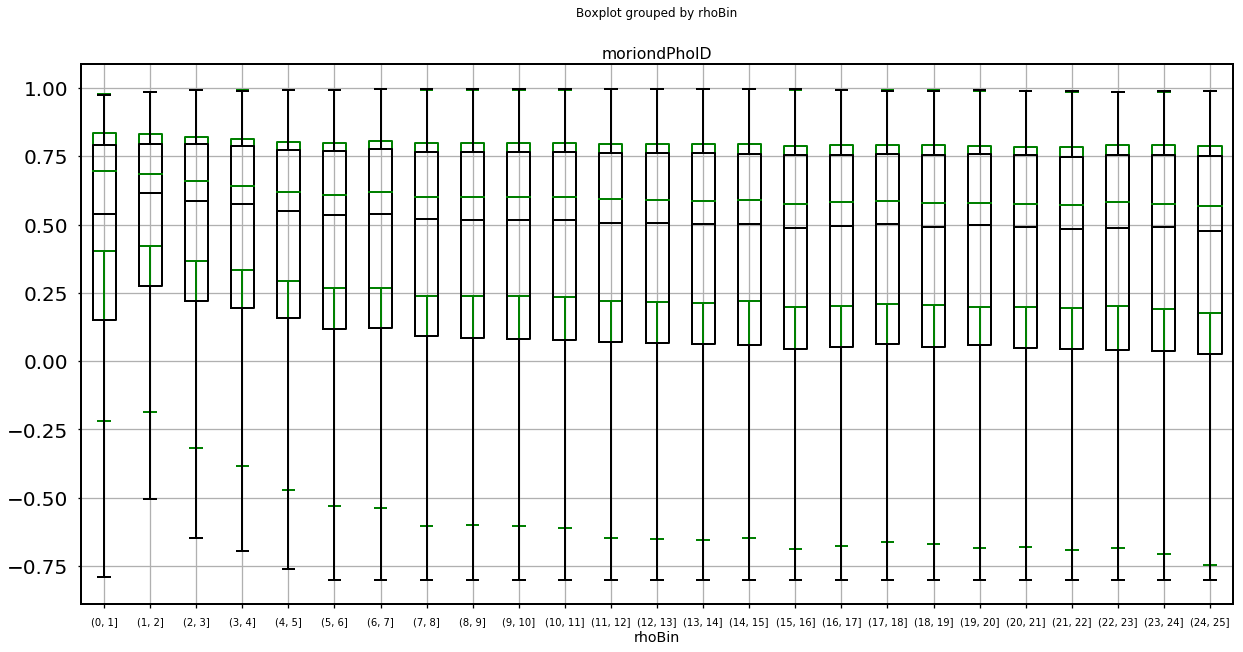

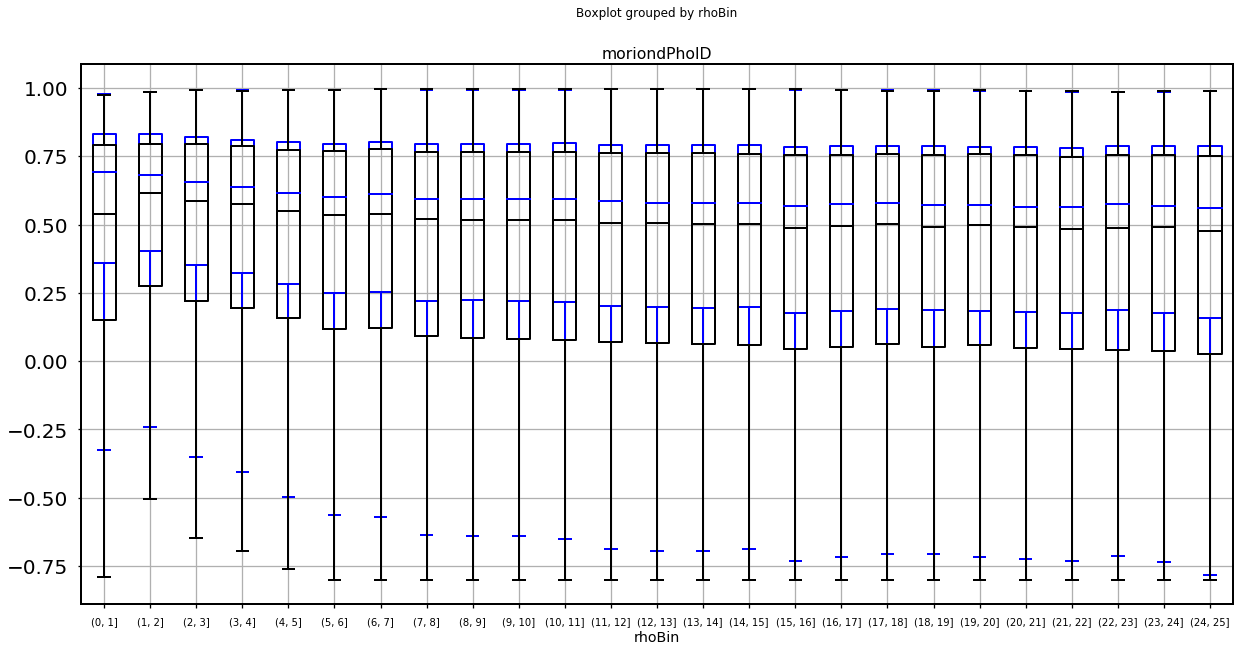

In [48]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'rhoBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'rhoBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrIso', 'rhoBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'rhoBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'rhoBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'rhoBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrIso', 'rhoBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'rhoBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')
fig.show()

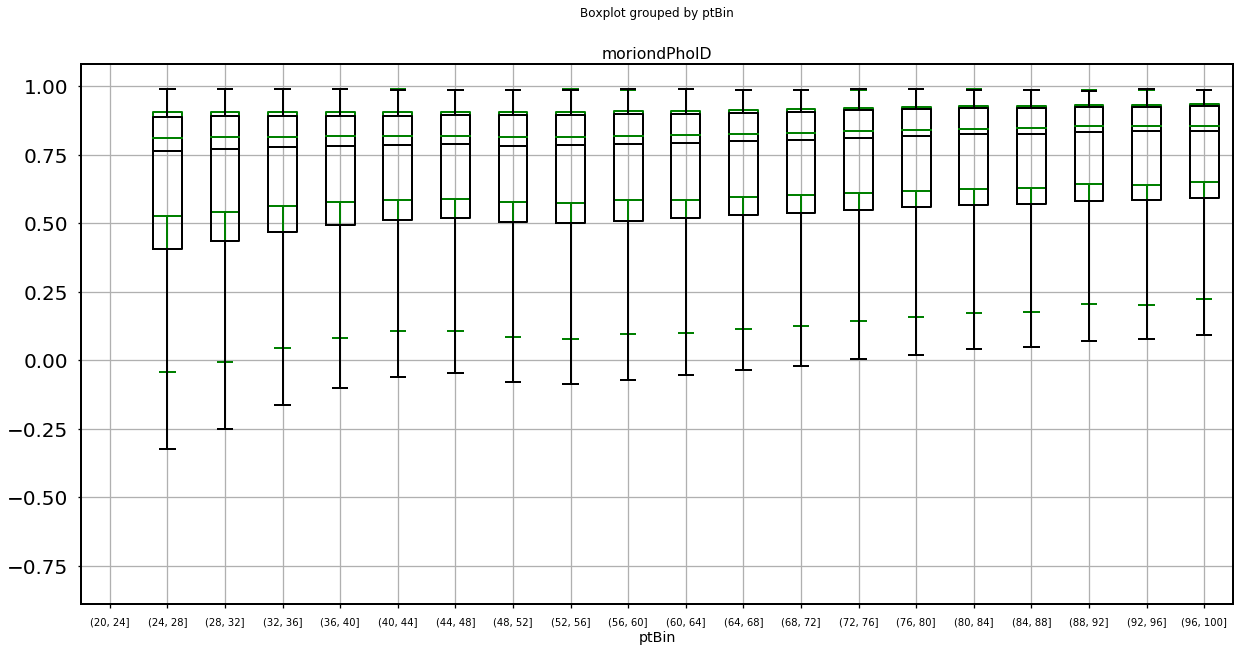

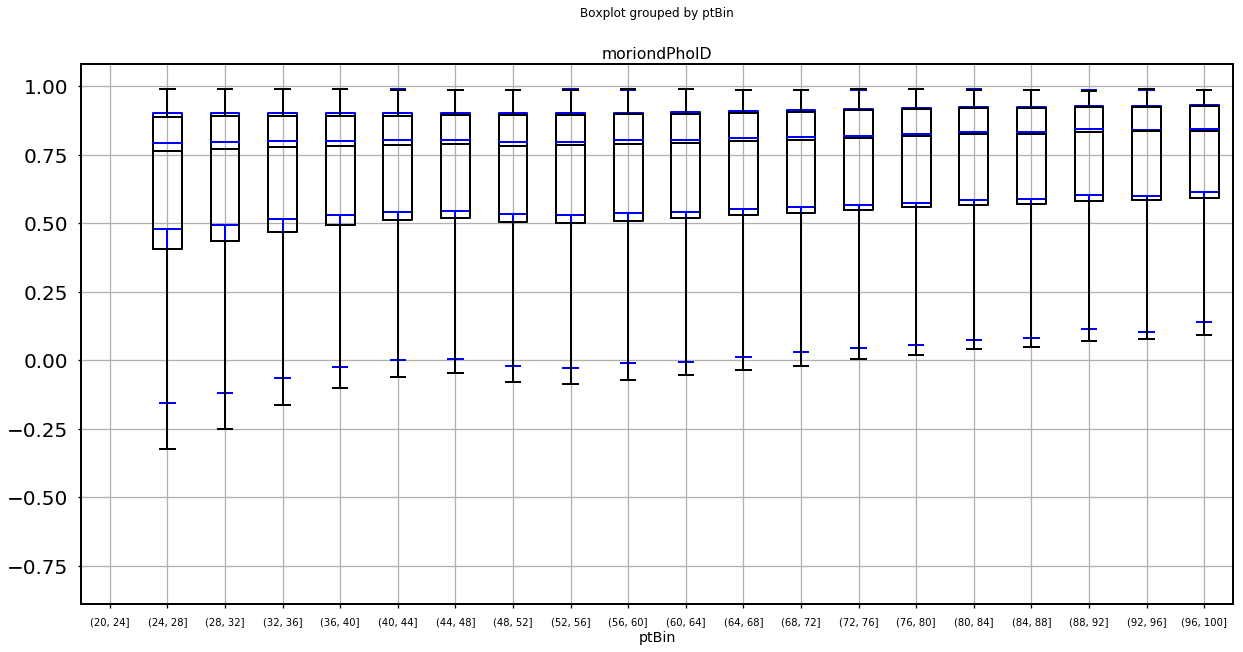

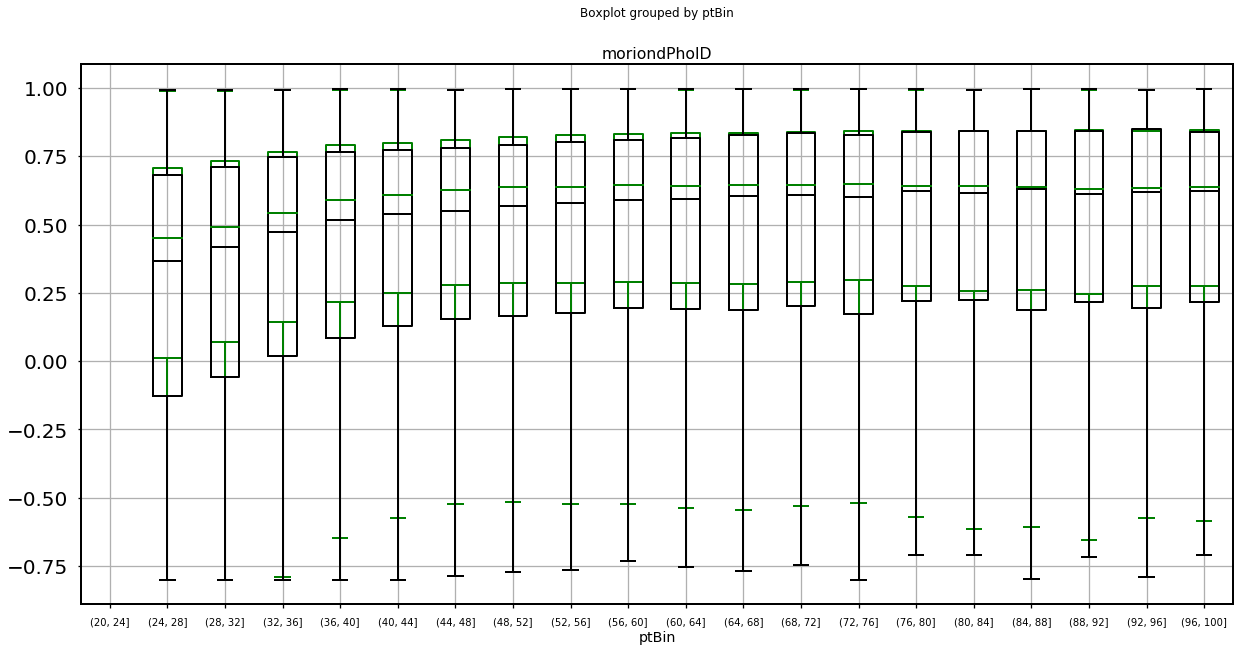

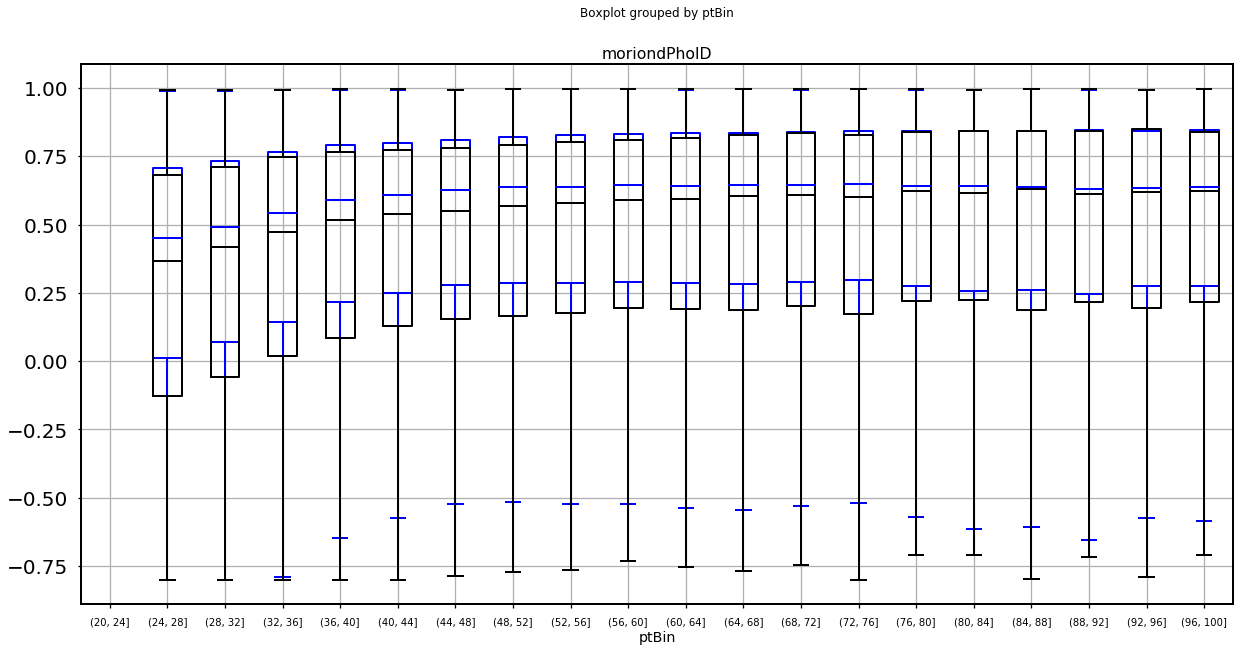

In [49]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrIso', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrIso', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrIso', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')
fig.show()

In [50]:
dfdata.to_root('data_moriond17_v7.root')

/mnt/t3nfs01/data01/shome/musella/.local/lib/python2.7/site-packages/root_numpy/_tree.py:617: UserWarning: converter for dtype('O') is not implemented (skipping)
  _librootnumpy.array2root(arr, filename, treename, mode)


In [51]:
dfmc.to_root('mc_moriond17_v7.root')

In [52]:
# dfmc[ dfmc['weight'] <1 ].hist('weight')

In [53]:
# dfmc[ dfmc['weight'] > 1 ].hist('weight')